In [2]:
from math import sqrt

import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import skimage
from skimage import io, exposure, img_as_float, img_as_ubyte, morphology, filters, util
from skimage.color import rgb2gray, label2rgb
from skimage.feature import canny, blob_dog, blob_log, blob_doh,  peak_local_max
from skimage.filters import sobel, threshold_otsu, try_all_threshold, threshold_local, threshold_minimum
from skimage.segmentation import clear_border, watershed, random_walker
from skimage.measure import label, regionprops
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.morphology import closing

import cv2

from scipy import ndimage as ndi
from scipy.stats import norm

import os

import statistics

import plotly.graph_objs as go

import pickle

In [ ]:
with open("/Users/carolinemccue/Desktop/MG63/r01c02f26p03-ch2sk1fk1fl1/area5.pkl", 'rb') as f:
    area5 = pickle.load(f)

area5.head(5)

In [3]:
# 2.5 um

with open("/Users/carolinemccue/Desktop/MG63/r01c01f01p01-ch2sk1fk1fl1/labeled_carolinemccue.pkl", 'rb') as f:
    num_posts2p5 = pickle.load(f)
    
posts2p5 = {k:v for k,v in num_posts2p5.items() if v != 'Delete'}

num_posts_2p5 = list(posts2p5.values())
num_posts_2p5 = list(map(int, num_posts_2p5))
mean2p5 = statistics.mean(num_posts_2p5)
std2p5 = statistics.stdev(num_posts_2p5)
print(mean2p5, std2p5)

22.682926829268293 9.4748061309724


In [4]:
# 5 um

with open("/Users/carolinemccue/Desktop/MG63/r01c02f26p03-ch2sk1fk1fl1/labeled_carolinemccue.pkl", 'rb') as f:
    num_posts5 = pickle.load(f)
    
posts5 = {k:v for k,v in num_posts5.items() if v != 'Delete'}

num_posts_5 = list(posts5.values())
num_posts_5 = list(map(int, num_posts_5))
mean5 = statistics.mean(num_posts_5)
std5 = statistics.stdev(num_posts_5)
print(mean5, std5)


12.121951219512194 6.173309979059935


In [5]:
# 10 um

with open("/Users/carolinemccue/Desktop/MG63/r01c03f60p02-ch2sk1fk1fl1/labeled_carolinemccue.pkl", 'rb') as f:
    num_posts10 = pickle.load(f)
    
posts10 = {k:v for k,v in num_posts10.items() if v != 'Delete'}

num_posts_10 = list(posts10.values())
num_posts_10 = list(map(int, num_posts_10))
mean10 = statistics.mean(num_posts_10)
std10 = statistics.stdev(num_posts_10)
print(mean10, std10)


5.631578947368421 1.6993011700613387


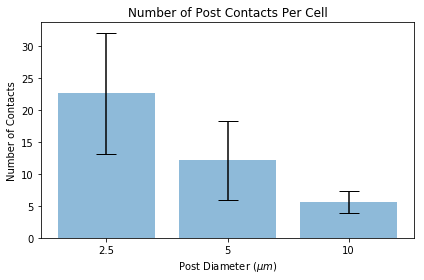

In [6]:
postsize = ['2.5', '5', '10']
x = np.arange(len(postsize))
y = [mean2p5, mean5, mean10]
errory = [std2p5, std5, std10]

fig, ax = plt.subplots()
ax.bar(x, y, yerr = errory, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Number of Contacts')
ax.set_xticks(x)
ax.set_xticklabels(postsize)
ax.set_xlabel('Post Diameter ($\mu m$)')
ax.set_title('Number of Post Contacts Per Cell')


# Save the figure and show
plt.tight_layout()
plt.savefig('Postcontacts')
plt.show()

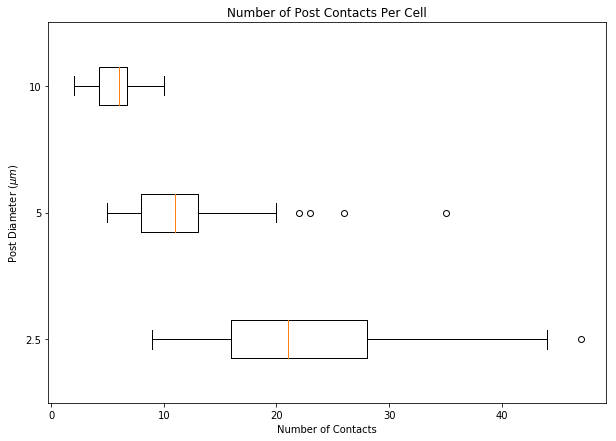

In [9]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

num_posts = [num_posts_2p5, num_posts_5, num_posts_10]

bp = ax.boxplot(num_posts, vert = 0)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['2.5', '5', '10'])
ax.set_title('Number of Post Contacts Per Cell')

     
# show plot
plt.show()